In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import os, sys, time
import pandas as pd
import scipy.stats as stats
sys.path.append('../../')
import gp_regression as gp

%matplotlib inline

In [2]:
np.random.seed(3)
x = np.linspace(0,4,  num=50)
y = 2*x

scale=1
y_obs = y + stats.norm.rvs(scale=scale, size=len(x))

cov = gp.covariance_functions(1, 10)
gp_obj = gp.gaussian_process(x, x, y_obs, scale, cov)

ystar, var = gp_obj.regression()
y_hi = ystar + np.sqrt(var)*1.96
y_lo = ystar - np.sqrt(var)*1.96

In [15]:
# print(gp_obj.post_mean)
# print(gp_obj.post_cov)

In [16]:
print(gp_obj.post_mean.sum())
print(gp_obj.post_cov.sum())

184.53191677158776
49.8033263430968


In [17]:
print(np.trapz(gp_obj.post_mean, x))
L_2 = np.trapz(np.trapz(gp_obj.post_cov, x, axis=1), x)
print(L_2)

14.73449854032069
0.32083911137964316


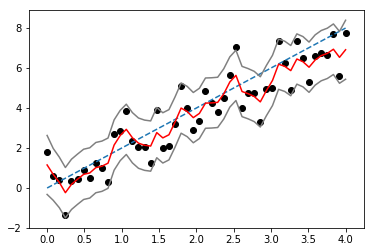

In [18]:
plt.figure()
plt.plot(x, y, '--')
plt.scatter(x, y_obs, color='black')
plt.plot(x, ystar, '-r')
plt.plot(x, y_hi, color='grey')
plt.plot(x, y_lo, color='grey')
plt.show()

In [20]:
samples = gp_obj.rvs(size=100)
int_samples = np.trapz(samples, x, axis=1)
print(int_samples.mean(), int_samples.var())

14.738386448837122 0.27623553356956004


In [21]:
# Now what happens if we also observe/know that the intergral of the data is 16
# /int_0^4 2x dx = 16

l_mu = 16
K = gp_obj.post_cov
L_k = np.trapz(gp_obj.post_cov, x, axis=1)
# L_2 = 3.76
mu_fl = L_k/L_2*l_mu
K_fl = K - np.outer(L_k,L_k.T)/L_2

gp_obj2 = gp.gaussian_process(x, x, y_obs, scale, cov)

gp_obj2.post_mean = mu_fl
gp_obj2.post_cov = K_fl

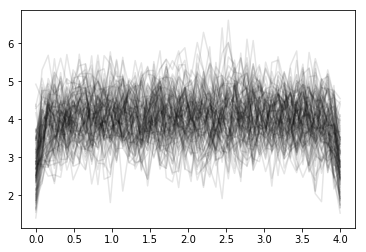

[16.00000001 16.         16.         16.         16.00000001 16.
 16.00000002 16.         15.99999999 15.99999999]


In [22]:
plt.figure()
plt.plot(x, gp_obj2.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

print(np.trapz(gp_obj2.rvs(size=10),x, axis=1))

In [4]:
# Now let's try a df/dx|x=0 = c

x2 = np.linspace(0, 4, num=10)
y2 = 2*x2
y_obs2 = y2 + stats.norm.rvs(scale=scale, size=len(x2))

cov2 = gp.covariance_functions(1, 20)
gp_obj3 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)
ystar2, var2 = gp_obj3.regression()

l_mu2 = 2
K2 = gp_obj3.post_cov
L_k2 = (gp_obj3.post_cov[1] - gp_obj3.post_cov[0])/(x2[1]-x2[0])
L_22 = (L_k2[1] - L_k2[0])/(x2[1]-x2[0])

mu2_fl = L_k2/L_22*l_mu2
K2_fl = K2 - np.outer(L_k2,L_k2.T)/(L_22)

gp_obj4 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)

gp_obj4.post_mean = mu2_fl
gp_obj4.post_cov = K2_fl

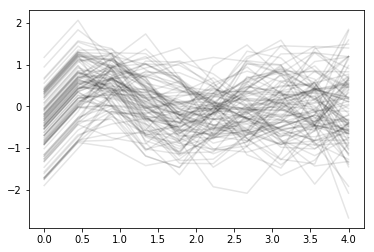

2.0000000387845827


In [5]:
plt.figure()
plt.plot(x2, gp_obj4.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

sample = gp_obj4.rvs()

print((sample[1]-sample[0])/(x2[1]-x2[0]))

In [14]:
cov3 = gp.covariance_functions(1, 20)
gp_obj5 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)
ystar3, var3 = gp_obj5.regression()

K3 = gp_obj5.post_cov
L_k3 = np.gradient(K3, x2, axis=0)[-1]

L_23 = np.gradient(L_k3, x2)[-1]

l_mu3 = 1
mu3_fl = L_k3/L_23*l_mu3

print(mu3_fl)

K3_fl = K3 - np.outer(L_k3,L_k3.T)/(L_23)

gp_obj6 = gp.gaussian_process(x2, x2, y_obs2, scale, cov2)

gp_obj6.post_mean = mu3_fl
gp_obj6.post_cov = K3_fl

[ 0.00497986  0.00208372 -0.01678907 -0.01032402  0.03762771  0.04491599
 -0.07714199 -0.2223217  -0.12049201  0.32395244]


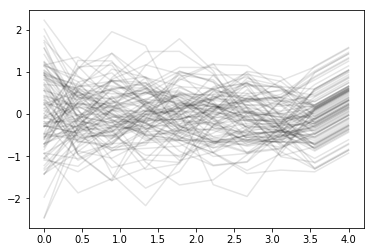

1.0000000136473588


In [13]:
plt.figure()
plt.plot(x2, gp_obj6.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

sample2 = gp_obj6.rvs()

print(np.gradient(sample2, x2)[-1])

In [ ]:
# Now want to try d^2f/dx^2|x=0 = 0

In [200]:
x4 = np.linspace(0, 4, num=10)
y4 = 2*x4
y_obs4 = y4 + stats.norm.rvs(scale=scale, size=len(x4))

cov4 = gp.covariance_functions(1, 20)
gp_obj6 = gp.gaussian_process(x4, x4, y_obs4, scale, cov4)
ystar4, var4 = gp_obj6.regression()

K4 = gp_obj6.post_cov
L_k4 = np.gradient(np.gradient(K4, x4, axis=0), x4, axis=0)[0]

L_24 = np.gradient(np.gradient(L_k4, x4), x4)[0]

l_mu4 = 0
mu4_fl = L_k4/L_24*l_mu4
K4_fl = K4 - np.outer(L_k4,L_k4.T)/(L_24)

gp_obj7 = gp.gaussian_process(x4, x4, y_obs4, scale, cov4)

gp_obj7.post_mean = mu4_fl
gp_obj7.post_cov = K4_fl

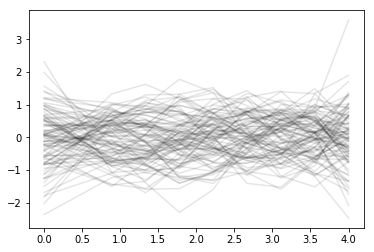

-2.3699426421330827e-08


In [203]:
plt.figure()
plt.plot(x4, gp_obj7.rvs(size=100).T, 'k-', alpha=0.1)
plt.show()

sample3 = gp_obj7.rvs()

print(np.gradient(np.gradient(sample3, x4), x4)[0])

In [32]:
# Now want to try d^2f/dx^2 = 0 for all x

x5 = np.linspace(0, 4, num=4)
x5_star = np.linspace(0, 4, num=20)
y5 = 2*x5_star
y_obs5 = y5 + stats.norm.rvs(scale=scale, size=len(x5_star))

cov5 = gp.covariance_functions(1, 20)
cov5_star = gp.covariance_functions(1, 20)
gp_obj5 = gp.gaussian_process(x5, x5, 2*x5, scale, cov5)
gp_obj5_star = gp.gaussian_process(x5_star, x5_star, y_obs5, scale, cov5_star)

Y5, var5 = gp_obj5.regression()
Y_star5, var_star5 = gp_obj5_star.regression()

K5 = gp_obj5.post_cov

L_5 = np.gradient(K5, x5, axis=0)
L_50 = np.gradient(L_5, x5, axis=1)

K51 = gp.covariance_functions(1, 20)
k_51 = K51.squared_exponential(x5, x5_star)

L_51 = np.gradient(k_51, x5_star, axis=1)
L_15 = L_51.T


l_mu5 = np.zeros(len(x5))

mu5_fl = L_15 @ np.linalg.inv(L_50) @ l_mu5 # questionable

K5_fl = gp_obj5_star.post_cov - L_15 @ np.linalg.inv(L_50)  @ L_51 # also questionable

gp_obj8 = gp.gaussian_process(x5_star, x5_star, 2*x5_star, scale, cov5_star)

gp_obj8.post_mean = mu5_fl
gp_obj8.post_cov = K5_fl

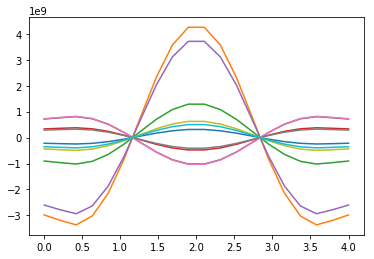

[-4.96295066e+08 -4.57819012e+08  1.98295249e+08  1.45791696e+09
  2.63211506e+09  3.45964905e+09  3.72687709e+09  3.32742584e+09
  2.29834352e+09  8.20310628e+08 -8.20310545e+08 -2.29834349e+09
 -3.32742578e+09 -3.72687706e+09 -3.45964900e+09 -2.63211521e+09
 -1.45791693e+09 -1.98295123e+08  4.57818762e+08  4.96294590e+08]


In [34]:
plt.figure()
plt.plot(x5_star, gp_obj8.rvs(size=10).T, '-', alpha=1)
plt.show()

sample4 = gp_obj8.rvs()

print(np.gradient(sample4, x5_star))

In [35]:
# The above didn't work. Try one or two points with derivative = 0